## Popular Data Science Questions
Our goal in this project is to use Data Science Stack Exchange to determine what content should a data science education company create, based on interest by subject.

## Stack Exchange
What kind of questions are welcome on this site?
On DSSE's help center's section on questions , we can read that we should:

### Avoid subjective questions.
Ask practical questions about Data Science — there are adequate sites for theoretical questions.
Ask specific questions.
Make questions relevant to others.
All of these characteristics, if employed, should be helpful attributes to our goal.

In the help center we also learned that in addition to the sites mentioned in the Learn section, there are other two sites that are relevant:

Open Data (Dataset requests)
Computational Science (Software packages and algorithms in applied mathematics)
What, other than questions, does DSSE's home subdivide into?
On the home page we can see that we have four sections:

Questions — a list of all questions asked;
Tags — a list of tags (keywords or labels that categorize questions);

tags_ds

Users — a list of users;
Unanswered — a list of unanswered questions;
The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.

Something else we can learn from exploring the help center, is that Stack Exchange's sites are heavily moderated by the community; this gives us some confidence in using the tagging system to derive conclusions.

What information is available in each post?
Looking, just as an example, at this question, some of the information we see is:

For both questions and answers:
The posts's score;
The posts's title;
The posts's author;
The posts's body;
For questions only:
How many users have it on their "
The last time the question as active;
How many times the question was viewed;
Related questions;
The question's tags;
Stack Exchange Data Explorer
Perusing the table names, a few stand out as relevant for our goal:

Posts
PostTags
Tags
TagSynonyms
Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

Id	TagName	Count	ExcerptPostId	WikiPostId
2	machine-learning	6919	4909	4908
46	python	3907	5523	5522
81	neural-network	2923	8885	8884
194	deep-learning	2786	8956	8955
77	classification	1899	4911	4910
324	keras	1736	9251	9250
128	scikit-learn	1303	5896	5895
321	tensorflow	1224	9183	9182
47	nlp	1162	147	146
24	r	1114	49	48


## Data Explorer

In [90]:

# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [91]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [92]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


In this dataset has missing values only in FavoritrCount

In [93]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [94]:
questions["FavoriteCount"].fillna(0,inplace = True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)

In [95]:
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [96]:
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [97]:
questions.sample(2)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
8016,44358,2019-01-22 06:08:57,0,47,"[deep-learning, prediction, social-network-ana...",1,0
8270,65547,2019-12-28 10:32:15,3,16,"[dataset, cnn, data-cleaning, categorical-data...",0,0


 ## Most Used and Most Viewed

**We will begin to count**

In [98]:
tags_count = {}

for tags in questions["Tags"]:
    for tag in tags:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1
tags_count

{'.net': 1,
 '3d-object-detection': 1,
 '3d-reconstruction': 9,
 'ab-test': 6,
 'accuracy': 89,
 'activation': 1,
 'activation-function': 44,
 'active-learning': 4,
 'activity-recognition': 5,
 'actor-critic': 21,
 'adaboost': 1,
 'aggregation': 12,
 'ai': 25,
 'alex-net': 5,
 'algorithms': 68,
 'allennlp': 2,
 'amazon-ml': 1,
 'anaconda': 20,
 'ann': 2,
 'annotation': 12,
 'anomaly': 4,
 'anomaly-detection': 92,
 'anonymization': 3,
 'anova': 2,
 'apache-hadoop': 13,
 'apache-nifi': 1,
 'apache-spark': 35,
 'arima': 11,
 'association-rules': 19,
 'attention-mechanism': 26,
 'auc': 3,
 'audio-recognition': 25,
 'autoencoder': 106,
 'automatic-summarization': 10,
 'automation': 4,
 'automl': 2,
 'aws': 20,
 'aws-lambda': 2,
 'azure-ml': 12,
 'backpropagation': 65,
 'batch-normalization': 29,
 'bayes-error': 1,
 'bayesian': 40,
 'bayesian-networks': 12,
 'bayesian-nonparametric': 2,
 'beginner': 27,
 'bert': 64,
 'bias': 19,
 'bigdata': 95,
 'binary': 26,
 'bioinformatics': 4,
 'books': 

** Creating dataframe**

In [99]:
tag_count = pd.DataFrame.from_dict(tags_count, orient = "index")
tag_count.rename(columns = {0: "Count"}, inplace = True)
tag_count.sample(2)

,Count
pattern-recognition,1
deep-learning,1220


In [100]:
most_used = tag_count.sort_values(by = "Count", ascending = False).head(20)
most_used

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


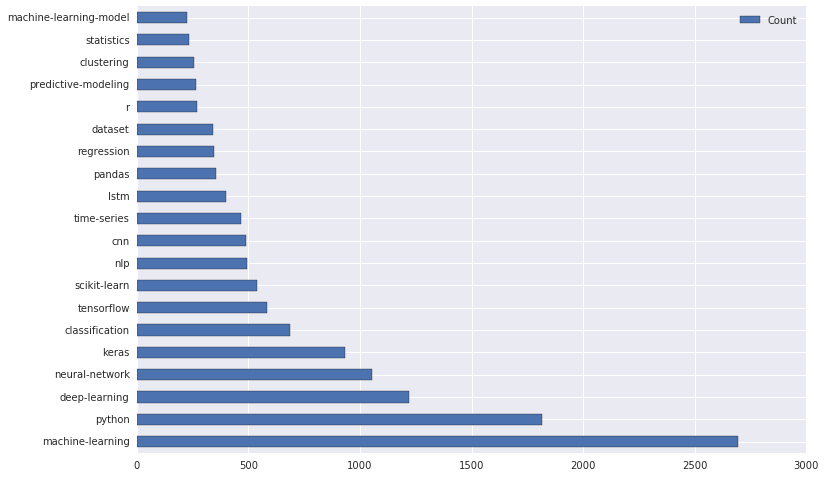

In [101]:
most_used.plot(kind= "barh", figsize = (12,8))

In [102]:
tag_most_viewed = {}

for index ,row in questions.iterrows():
    for tag in row["Tags"]:
        if tag in tag_most_viewed:
            tag_most_viewed[tag] += row["ViewCount"]
        else:
            tag_most_viewed[tag] = row["ViewCount"]

In [103]:
viewed_count = pd.DataFrame.from_dict(tag_most_viewed, orient = "index")
viewed_count.rename(columns = {0:"ViewCount"}, inplace = True)
viewed_count


,ViewCount
usecase,46
json,3418
wikipedia,23
keras,268608
keras-rl,673
sports,59
loss-function,23160
probabilistic-programming,633
classification,104457
csv,38654


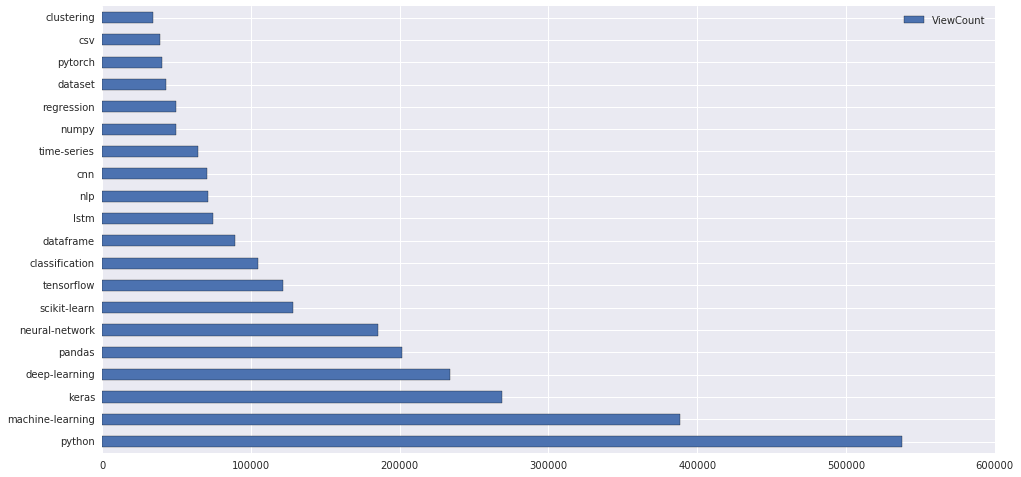

In [104]:
most_viewed = viewed_count.sort_values(by = "ViewCount", ascending = False).head(20)
most_viewed.plot(kind = "barh",figsize = (16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ee5641780>],
      dtype=object)

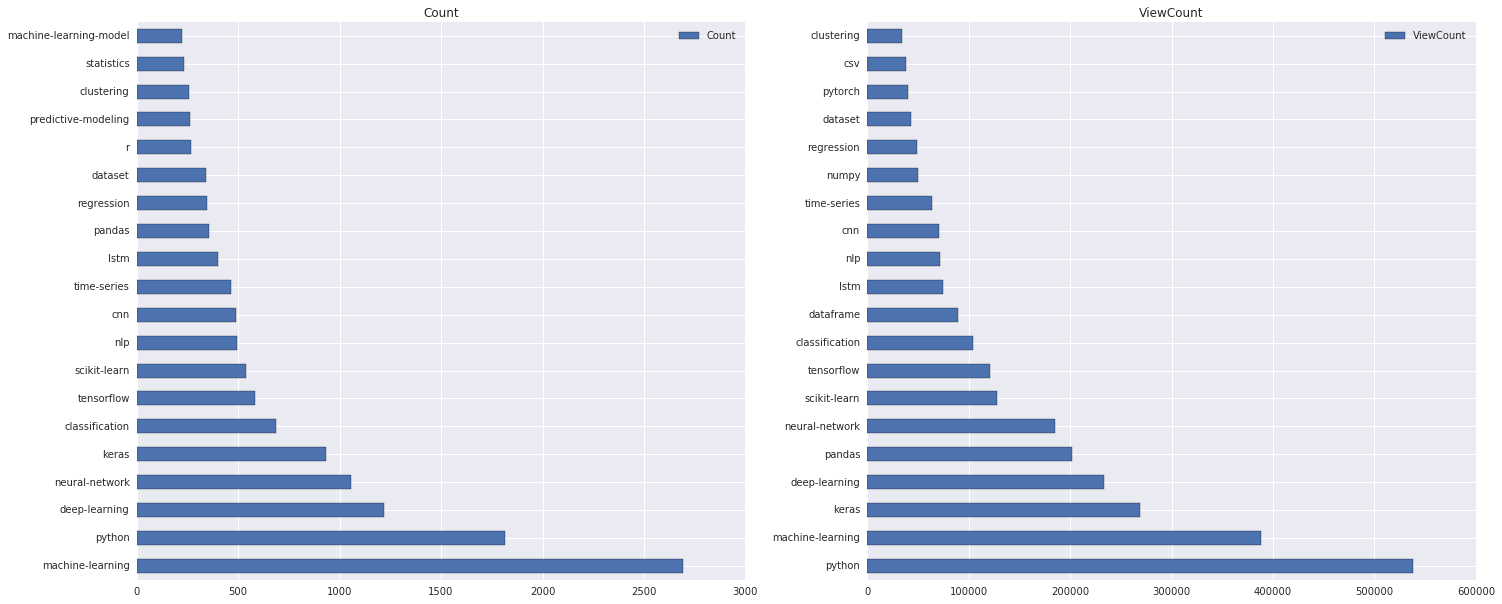

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [106]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

## Relations Between Tags

In [107]:
in_used

,Count,ViewCount
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [108]:
in_viewed

,Count,ViewCount
python,1814.0,537585
machine-learning,2693.0,388499
keras,935.0,268608
deep-learning,1220.0,233628
pandas,354.0,201787
neural-network,1055.0,185367
scikit-learn,540.0,128110
tensorflow,584.0,121369
classification,685.0,104457
dataframe,NaN,89352


1. machine-learning-model
2. statistics
3. predictive-modeling
4. r

these tags aren't in most viewed


1. csv
2. pytorch
3. dataframe
4. numpy

these tags aren't in most used

In [109]:
all_tags = list(tag_count.index)

In [110]:
associations = pd.DataFrame(index = all_tags, columns = all_tags)
associations

,usecase,json,wikipedia,keras,keras-rl,sports,loss-function,probabilistic-programming,classification,csv,...,marginal-effects,redshift,orange,convergence,word,ngrams,pooling,geospatial,web-scrapping,crawling
usecase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
json,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wikipedia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keras-rl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loss-function,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
probabilistic-programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
associations.fillna(0,inplace = True)

for tags in questions["Tags"]:
    associations.loc[tags,tags] += 1

In [112]:
associations

,usecase,json,wikipedia,keras,keras-rl,sports,loss-function,probabilistic-programming,classification,csv,...,marginal-effects,redshift,orange,convergence,word,ngrams,pooling,geospatial,web-scrapping,crawling
usecase,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
json,0,10,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
wikipedia,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keras,0,0,0,935,1,0,43,0,58,2,...,0,0,0,0,0,0,0,0,0,0
keras-rl,0,0,0,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sports,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
loss-function,0,0,0,43,0,0,161,0,11,0,...,0,0,0,3,0,0,0,0,0,0
probabilistic-programming,0,0,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,0
classification,0,0,0,58,0,0,11,0,685,1,...,0,0,0,1,0,0,0,0,0,0
csv,0,1,0,2,0,0,0,0,1,27,...,0,0,0,0,0,0,0,0,0,0


In [113]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [114]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

In [115]:
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,NaN,499.0,429.0,366.0,195.0,259.0,106.0,188.0,113.0,124.0,131.0,71.0,62.0,119.0,99.0,63.0,123.0,61.0,89.0,139.0
python,499.0,NaN,160.0,137.0,280.0,98.0,167.0,235.0,71.0,62.0,105.0,61.0,244.0,59.0,53.0,24.0,35.0,45.0,35.0,37.0
deep-learning,429.0,160.0,NaN,305.0,247.0,59.0,136.0,16.0,72.0,160.0,44.0,103.0,1.0,21.0,32.0,5.0,32.0,2.0,12.0,19.0
neural-network,366.0,137.0,305.0,NaN,235.0,65.0,108.0,24.0,24.0,118.0,33.0,69.0,1.0,42.0,20.0,9.0,13.0,8.0,11.0,10.0
keras,195.0,280.0,247.0,235.0,NaN,58.0,256.0,34.0,23.0,116.0,51.0,133.0,3.0,31.0,13.0,10.0,11.0,0.0,3.0,17.0
classification,259.0,98.0,59.0,65.0,58.0,NaN,20.0,47.0,35.0,20.0,25.0,20.0,3.0,34.0,28.0,10.0,27.0,12.0,19.0,21.0
tensorflow,106.0,167.0,136.0,108.0,256.0,20.0,NaN,15.0,11.0,57.0,9.0,43.0,3.0,9.0,9.0,1.0,6.0,0.0,0.0,9.0
scikit-learn,188.0,235.0,16.0,24.0,34.0,47.0,15.0,NaN,12.0,0.0,12.0,2.0,37.0,37.0,9.0,1.0,12.0,24.0,6.0,18.0
nlp,113.0,71.0,72.0,24.0,23.0,35.0,11.0,12.0,NaN,7.0,0.0,19.0,3.0,2.0,11.0,4.0,1.0,9.0,3.0,4.0
cnn,124.0,62.0,160.0,118.0,116.0,20.0,57.0,0.0,7.0,NaN,8.0,24.0,1.0,6.0,11.0,2.0,6.0,0.0,1.0,4.0


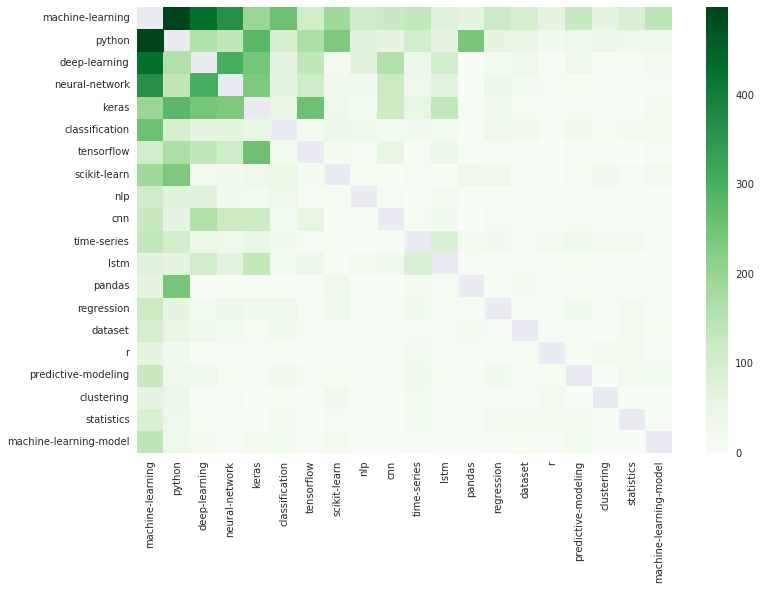

In [116]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

## Domain Knowladge

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If we want to be very specific, we can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

In [137]:
all_q = pd.read_csv("all_questions.csv", parse_dates = ["CreationDate"])

In [138]:
all_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [139]:
all_q.sample(2)

,Id,CreationDate,Tags
12783,9863,2016-01-20 01:18:02,<tensorflow><rnn>
16995,45344,2019-02-10 17:31:41,<neural-network><classification><scikit-learn>


In [140]:
all_q["Tags"] = all_q["Tags"].str.replace("^<|>$","").str.split("><")

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. You can use Google and read the tags descriptions to reach similar results.

We'll now create a function that assigns 1 to deep learning questions and 0 otherwise; and we use it.

In [141]:
def clas_deeplearning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]:
            return 1
        else:
            return 0
all_q["Deeplearning"] = all_q["Tags"].apply(clas_deeplearning)

In [142]:
all_q.sample(4)

,Id,CreationDate,Tags,Deeplearning
10029,41885,2018-11-30 06:47:40,"[machine-learning, dataset, feature-selection,...",0
12163,61649,2019-10-12 18:55:18,"[neural-network, deep-learning, meta-learning]",1
11351,29741,2018-03-30 19:45:27,"[python, time-series, marketing]",0
2443,46514,2019-03-02 10:05:54,"[machine-learning, data-mining, svm, logistic-...",0


In [143]:
all_q["Deeplearning"].value_counts()

0    17841
1     3735
Name: Deeplearning, dtype: int64

In [144]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]
all_q

,Id,CreationDate,Tags,Deeplearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",0
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


In [145]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1)//3)+1)
    return "{y}Q{q}".format(y=year,q=quarter)


In [146]:
all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [147]:
all_q.sample(3)

,Id,CreationDate,Tags,Deeplearning,Quarter
1168,488,2014-06-19 18:02:24,"[machine-learning, statistics, glm]",0,14Q2
15564,53112,2019-06-03 05:44:46,"[machine-learning, natural-language-process]",0,19Q2
896,37367,2018-08-23 19:30:05,"[machine-learning, feature-extraction, named-e...",0,18Q3


In [152]:
quarterly = all_q.groupby(by = "Quarter").agg({"Deeplearning":["sum","size"]})

In [158]:
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly

,DeepLearningQuestions,TotalQuestions
Quarter,,
14Q2,3,157
14Q3,4,189
14Q4,4,216
15Q1,5,190
15Q2,6,284
15Q3,13,311
15Q4,19,382
16Q1,38,516
16Q2,45,518


In [160]:
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]/quarterly["TotalQuestions"]

In [161]:
quarterly.sample()

,DeepLearningQuestions,TotalQuestions,DeepLearningRate
Quarter,,,
14Q2,3,157,0.019108


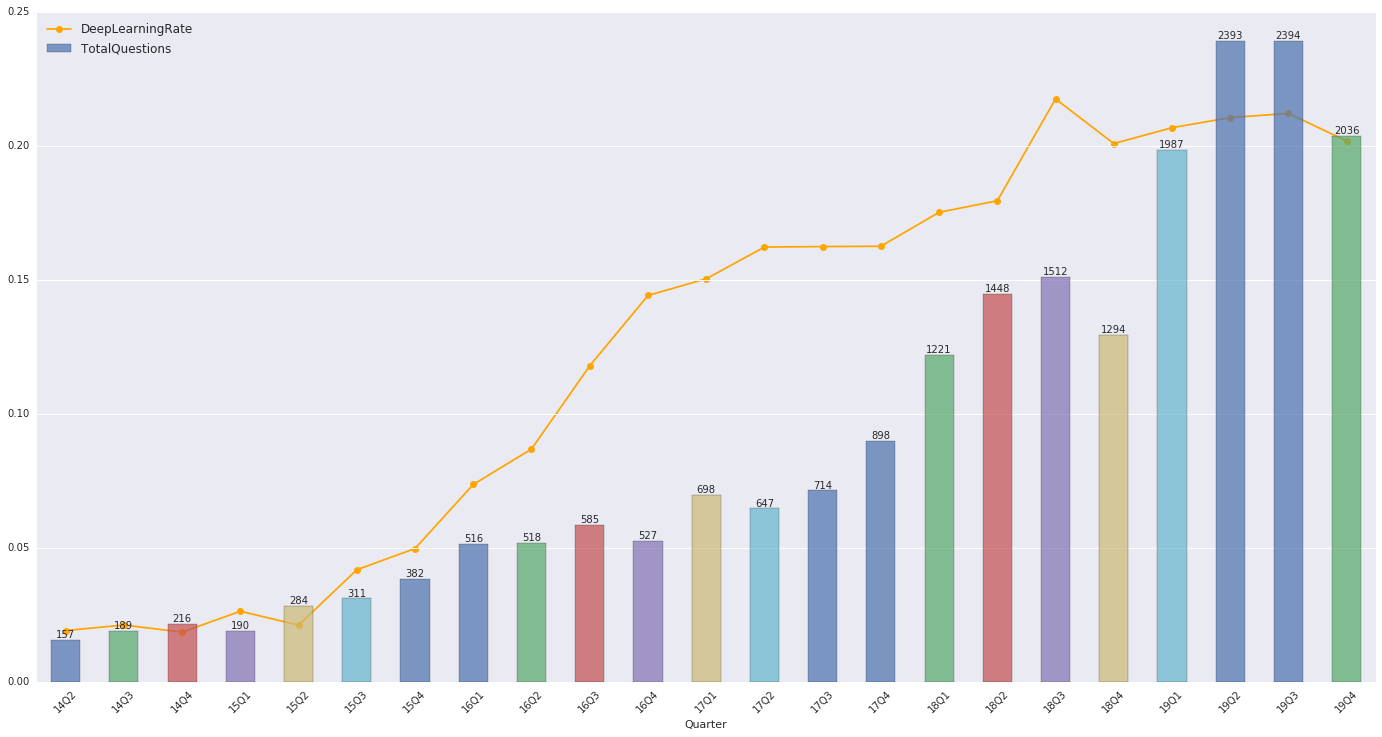

In [165]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)
